# K-means Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Create data points

In [2]:
df = pd.DataFrame(columns=['x', 'y'])

In [3]:
df.loc[0] = [3,1]
df.loc[1] = [4,1]
df.loc[2] = [3,2]
df.loc[3] = [4,2]
df.loc[4] = [10,5]
df.loc[5] = [10,6]
df.loc[6] = [11,5]
df.loc[7] = [11,6]
df.loc[8] = [15,1]
df.loc[9] = [15,2]
df.loc[10] = [16,1]
df.loc[11] = [16,2]

In [4]:
df

,x,y
0,3,1
1,4,1
2,3,2
3,4,2
4,10,5
5,10,6
6,11,5
7,11,6
8,15,1
9,15,2


## Visualize data points

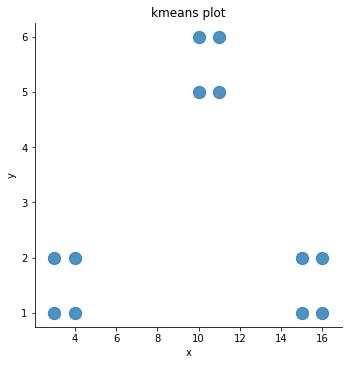

In [5]:
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={'s': 150})
plt.title('kmeans plot');

Before clustering, all the data points have the same color

## K-means Clustering

In [6]:
# convert dataframe to numpy array
data_points = df.values
data_points

array([[3, 1],
       [4, 1],
       [3, 2],
       [4, 2],
       [10, 5],
       [10, 6],
       [11, 5],
       [11, 6],
       [15, 1],
       [15, 2],
       [16, 1],
       [16, 2]], dtype=object)

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Defalut init is k-means++

In [8]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [9]:
kmeans.cluster_centers_

array([[10.5,  5.5],
       [ 3.5,  1.5],
       [15.5,  1.5]])

In [10]:
x_centroid = []
y_centroid = []
for point in kmeans.cluster_centers_:
    x_centroid.append(point[0])
    y_centroid.append(point[1])

In [11]:
df['cluster_label'] = kmeans.labels_

In [12]:
df

,x,y,cluster_label
0,3,1,1
1,4,1,1
2,3,2,1
3,4,2,1
4,10,5,0
5,10,6,0
6,11,5,0
7,11,6,0
8,15,1,2
9,15,2,2


## Visualize Clustered data points

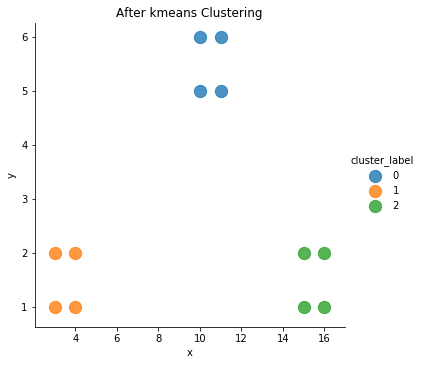

In [16]:
sns.lmplot('x', 'y', data=df, fit_reg=False,
          scatter_kws={'s': 150}, hue='cluster_label')
plt.title('After kmeans Clustering');

## Visualize Clustered data points with Centroid

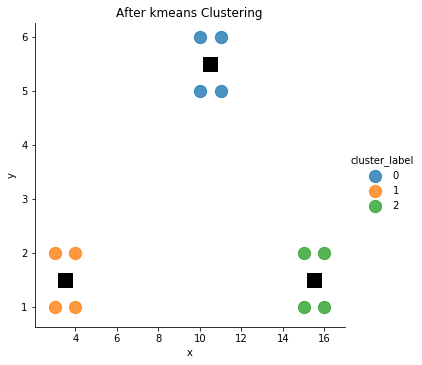

In [14]:
sns.lmplot('x', 'y', data=df, fit_reg=False,
          scatter_kws={'s': 150}, hue='cluster_label')
plt.scatter(x_centroid, y_centroid, s=200, c='black', marker='s')
plt.title('After kmeans Clustering');